In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
if (!require("tm")) install.packages("tm")

Loading required package: tm

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:httr’:

    content




In [2]:
# The "topicmodels" package enables LDA analysis.
if (!require("topicmodels")) install.packages("topicmodels")


Loading required package: topicmodels



In [3]:
# The "LDAVis" package enables visualization from the LDA analysis.
if (!require("LDAVis")) install.packages("LDAVis")

Loading required package: LDAVis

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘LDAVis’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘LDAVis’ is not available (for R version 3.6.3)”
Warning message:
“Perhaps you meant ‘LDAvis’ ?”


In [4]:
if (!require("LDAvis")) install.packages("LDAvis")


Loading required package: LDAvis



In [5]:
# The "servr" is used by LDAVis.
if (!require("servr")) install.packages("servr")

Loading required package: servr



In [6]:
# The "igraph" package enables creation of networks.
if (!require("igraph")) install.packages("igraph")  

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [7]:
# The following command loads the required packages.
library(topicmodels)
library(tm)
library(LDAvis)
library(igraph)
library(servr)

In [8]:
# ### Data loading
# #########################################
# corpus_pr  <-Corpus(DirSource("Texts\\PR"), readerControl = list(reader=readPlain))
# corpus_general  <-Corpus(DirSource("Texts\\General"), readerControl = list(reader=readPlain))

ERROR: Error in DirSource("Texts\\PR"): empty directory


In [9]:
load(url("https://github.com/RFJHaans/topicmodeling/blob/master/Data/2018/Data_pr.RData?raw=true"))
load(url("https://github.com/RFJHaans/topicmodeling/blob/master/Data/2018/Data_general.RData?raw=true"))

In [10]:
# 1) Remove numbers
corpusclean_pr <- tm_map(corpus_pr, removeNumbers)

In [11]:
# 2) Remove punctuation
corpusclean_pr <- tm_map(corpusclean_pr, removePunctuation)
# 3) Transform all upper-case letters to lower-case.
corpusclean_pr <- tm_map(corpusclean_pr,  content_transformer(tolower))
# 4) Remove stopwords which do not convey any meaning.
corpusclean_pr <- tm_map(corpusclean_pr, removeWords, stopwords("english")) # this stopword file is at C:\Users\[username]\Documents\R\win-library\2.13\tm\stopwords 
# 5) And strip whitespace. 
corpusclean_pr <- tm_map(corpusclean_pr , stripWhitespace)

In [12]:
# 1) Remove numbers
corpusclean_general <- tm_map(corpus_general, removeNumbers)
# 2) Remove punctuation
corpusclean_general <- tm_map(corpusclean_general, removePunctuation)
# 3) Transform all upper-case letters to lower-case.
corpusclean_general <- tm_map(corpusclean_general,  content_transformer(tolower))
# 4) Remove stopwords which do not convey any meaning.
corpusclean_general <- tm_map(corpusclean_general, removeWords, stopwords("english")) # this stopword file is at C:\Users\[username]\Documents\R\win-library\2.13\tm\stopwords 
# 5) And strip whitespace. 
corpusclean_general <- tm_map(corpusclean_general , stripWhitespace)


In [13]:
### More cleaning: infrequent words and frequent words
#########################################
# We convert the corpus to a "Document-term-matrix" (dtm)
dtm_pr <-DocumentTermMatrix(corpusclean_pr)  
dtm_general <-DocumentTermMatrix(corpusclean_general)  
# dtms are organized with rows being documents and columns being the unique words.


In [14]:
# To speed up the computation process for this tutorial, I have selected some of the most frequent words 
# that don't seem to be very meaningful. 
# We update the corpusclean corpus by removing these words. 
corpusclean_pr <- tm_map(corpusclean_pr, removeWords, c("words","also","can","get","going","just","well","said","will","thats","now","right","like","last","one","see"))
corpusclean_general <- tm_map(corpusclean_general, removeWords, c("words","also","can","get","going","just","well","said","will","thats","now","right","like","last","one","see"))


In [15]:
# We then create a dictionary that contains words occurring more than 50 times. 
highfreq50_pr <- findFreqTerms(dtm_pr,50,Inf)
highfreq50_general <- findFreqTerms(dtm_general,50,Inf)


In [16]:
# and create a smaller dtm
# Note that this is completed on the corpus, not the DTM. 
smalldtm_50w_pr <- DocumentTermMatrix(corpusclean_pr, control=list(dictionary = highfreq50_pr))
smalldtm_50w_general <- DocumentTermMatrix(corpusclean_general, control=list(dictionary = highfreq50_general))



In [17]:
# The following loads the data after processing via the above steps:
load(url("https://github.com/RFJHaans/topicmodeling/blob/master/Data/2018/Data_preTM.RData?raw=true"))


In [18]:
#########################################
### LDA: Running the model
#########################################
# We first fix the random seed for future replication.
SEED <- 123456789

#########################################
# 10 Topics
t1_10_pr <- Sys.time()
LDA10_pr <- LDA(smalldtm_50w_pr, k = 10, control = list(seed = SEED, verbose = 1))
t2_10_pr <- Sys.time()

t1_10_general <- Sys.time()
LDA10_general <- LDA(smalldtm_50w_general, k = 10, control = list(seed = SEED, verbose = 1))
t2_10_general <- Sys.time()

**** em iteration 1 ****
document 10
new alpha = 7.15483
**** em iteration 2 ****
document 10
new alpha = 6.39430
**** em iteration 3 ****
document 10
new alpha = 3.03310
**** em iteration 4 ****
document 10
new alpha = 1.15561
**** em iteration 5 ****
document 10
new alpha = 0.60883
**** em iteration 6 ****
document 10
new alpha = 0.47081
**** em iteration 7 ****
document 10
new alpha = 0.43932
**** em iteration 8 ****
document 10
new alpha = 0.43802
**** em iteration 9 ****
document 10
new alpha = 0.43546
**** em iteration 10 ****
document 10
new alpha = 0.42916
**** em iteration 11 ****
document 10
new alpha = 0.42445
**** em iteration 12 ****
document 10
new alpha = 0.42394
**** em iteration 13 ****
document 10
new alpha = 0.42281
**** em iteration 14 ****
document 10
new alpha = 0.42025
**** em iteration 15 ****
document 10
new alpha = 0.41386
**** em iteration 16 ****
document 10
new alpha = 0.40810
**** em iteration 17 ****
document 10
new alpha = 0.40125
**** em iteration 18 **

In [19]:
# Assess time it took to run:
t2_10_pr- t1_10_pr
t2_10_general- t1_10_general

Time difference of 2.935081 mins

Time difference of 2.248834 mins

In [21]:
#########################################
# 25 Topics
t1_25_pr <- Sys.time()
LDA25_pr <- LDA(smalldtm_50w_pr, k = 25, control = list(seed = SEED, verbose = 1))
t2_25_pr <- Sys.time()

t1_25_general <- Sys.time()
LDA25_general <- LDA(smalldtm_50w_general, k = 25, control = list(seed = SEED, verbose = 1))
t2_25_general <- Sys.time()

# Assess time it took to run:
t2_25_pr- t1_25_pr
t2_25_general- t1_25_general


**** em iteration 1 ****
document 10
new alpha = 0.91757
**** em iteration 2 ****
document 10
new alpha = 0.98012
**** em iteration 3 ****
document 10
new alpha = 0.46063
**** em iteration 4 ****
document 10
new alpha = 0.33342
**** em iteration 5 ****
document 10
new alpha = 0.31905
**** em iteration 6 ****
document 10
new alpha = 0.30824
**** em iteration 7 ****
document 10
new alpha = 0.30417
**** em iteration 8 ****
document 10
new alpha = 0.30007
**** em iteration 9 ****
document 10
new alpha = 0.29590
**** em iteration 10 ****
document 10
new alpha = 0.28963
**** em iteration 11 ****
document 10
new alpha = 0.28254
**** em iteration 12 ****
document 10
new alpha = 0.27698
**** em iteration 13 ****
document 10
new alpha = 0.27610
**** em iteration 14 ****
document 10
new alpha = 0.27597
final e step document 10
**** em iteration 1 ****
document 10
new alpha = 1.13505
**** em iteration 2 ****
document 10
new alpha = 0.35958
**** em iteration 3 ****
document 10
new alpha = 0.19044
*

Time difference of 9.636876 mins

Time difference of 7.896167 mins

In [22]:
# 50 Topics
t1_50_pr <- Sys.time()
LDA50_pr <- LDA(smalldtm_50w_pr, k = 50, control = list(seed = SEED, verbose = 1))
t2_50_pr <- Sys.time()

t1_50_general <- Sys.time()
LDA50_general <- LDA(smalldtm_50w_general, k = 50, control = list(seed = SEED, verbose = 1))
t2_50_general <- Sys.time()

# Assess time it took to run:
t2_50_pr- t1_50_pr
t2_50_general- t1_50_general


**** em iteration 1 ****
document 10
new alpha = 0.47047
**** em iteration 2 ****
document 10
new alpha = 0.47895
**** em iteration 3 ****
document 10
new alpha = 0.26068
**** em iteration 4 ****
document 10
new alpha = 0.22722
**** em iteration 5 ****
document 10
new alpha = 0.22201
**** em iteration 6 ****
document 10
new alpha = 0.22207
**** em iteration 7 ****
document 10
new alpha = 0.21924
**** em iteration 8 ****
document 10
new alpha = 0.21491
**** em iteration 9 ****
document 10
new alpha = 0.21075
**** em iteration 10 ****
document 10
new alpha = 0.20650
final e step document 10
**** em iteration 1 ****
document 10
new alpha = 0.50911
**** em iteration 2 ****
document 10
new alpha = 0.19266
**** em iteration 3 ****
document 10
new alpha = 0.13142
**** em iteration 4 ****
document 10
new alpha = 0.12943
**** em iteration 5 ****
document 10
new alpha = 0.13571
**** em iteration 6 ****
document 10
new alpha = 0.14260
**** em iteration 7 ****
document 10
new alpha = 0.14946
**** 

Time difference of 18.15082 mins

Time difference of 14.44981 mins

In [23]:
#########################################
### LDA: Rendering
#########################################
#########################################
# Terms per topic

#########################################
# 10 topics
# We then create a variable that captures the top ten terms assigned to the 10-topic model:
topics_LDA10_pr <- terms(LDA10_pr, 10)
# And show the results:
topics_LDA10_pr

topics_LDA10_general <- terms(LDA10_general, 10)
# And show the results:
topics_LDA10_general

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
million,market,technology,market,market,new,business,new,electric,company
new,think,vehicles,million,year,electric,year,growth,market,year
company,growth,energy,sales,company,business,new,energy,energy,quarter
information,million,power,energy,think,company,think,inc,quarter,vehicle
markets,new,year,year,sales,vehicle,energy,electric,think,product
electric,company,business,industry,business,million,sales,business,million,think
statements,energy,new,quarter,electric,year,first,million,global,million
quarter,products,market,automotive,first,power,time,customers,battery,business
power,year,systems,growth,table,vehicles,companies,tesla,question,new
energy,customers,statements,time,power,inc,today,financial,year,operating


Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
car,electric,know,new,people,tesla,contact,price,price,price
vehicles,time,cars,first,energy,new,new,total,electric,average
electric,year,president,obama,say,company,holds,new,total,month
cars,president,people,company,make,percent,location,year,stock,day
new,price,year,think,think,year,national,day,market,usd
company,cars,john,electric,new,million,house,energy,high,stock
year,company,dont,car,auto,pct,street,assets,day,company
gas,global,big,vehicles,billion,inc,energy,times,year,market
energy,million,time,million,know,electric,conference,month,month,year
first,high,years,hes,years,sent,president,market,insider,energy


In [24]:
#########################################
# 25 topics
topics_LDA25_pr <- terms(LDA25_pr, 25)
# And show the results:
topics_LDA25_pr

topics_LDA25_general <- terms(LDA25_general, 25)
# And show the results:
topics_LDA25_general

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,⋯,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25
million,market,business,energy,market,company,year,business,market,year,⋯,vehicle,market,million,company,new,market,market,electric,new,market
quarter,energy,new,market,business,year,business,energy,electric,quarter,⋯,market,electric,electric,energy,year,year,business,market,year,think
statements,company,year,sales,year,new,think,electric,energy,think,⋯,million,quarter,year,technology,energy,energy,million,company,million,company
years,think,think,million,sales,power,new,new,quarter,company,⋯,new,growth,quarter,sales,technology,business,technology,million,growth,million
think,years,electric,markets,think,two,markets,growth,information,business,⋯,company,new,market,electric,power,million,electric,business,company,sales
company,year,market,year,company,million,energy,market,think,million,⋯,think,sales,first,car,global,technology,think,new,market,technology
new,new,energy,automotive,table,electric,first,customers,question,years,⋯,energy,customers,sales,vehicles,vehicles,vehicle,products,think,years,years
fuel,weve,million,industry,electric,think,two,results,year,new,⋯,product,vehicle,industry,million,think,car,battery,energy,inc,products
two,growth,vehicles,growth,first,industrial,technology,dont,technology,vehicle,⋯,technology,industry,energy,markets,information,electric,vehicles,vehicles,markets,year
technology,vehicles,statements,years,energy,vehicles,vehicles,global,global,first,⋯,growth,think,companies,think,sales,products,share,year,information,statements


Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,⋯,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Topic 25
company,year,know,obama,people,tesla,contact,total,deadline,energy,⋯,new,price,new,new,obama,electric,month,years,day,today
pct,car,people,car,cars,electric,location,new,dec,price,⋯,car,stock,million,energy,dont,new,price,people,price,price
year,years,year,year,years,year,holds,price,new,day,⋯,percent,company,electric,people,auto,vehicles,market,say,year,company
vehicles,ago,time,think,car,new,new,day,car,company,⋯,tesla,new,percent,oil,know,company,stock,new,total,president
car,price,years,hes,billion,company,national,year,cars,month,⋯,inc,total,cars,house,new,president,year,think,market,cars
cars,people,big,today,think,cars,president,month,vehicles,new,⋯,people,shares,first,john,president,total,assets,oil,electric,know
electric,month,cars,mccain,market,sent,house,energy,nov,shares,⋯,company,average,energy,cars,energy,year,months,know,stocks,car
energy,cars,street,first,year,state,conference,company,gas,stock,⋯,electric,times,general,think,first,price,energy,mccain,index,stocks
million,global,john,electric,time,inc,director,assets,notified,assets,⋯,make,day,time,way,make,power,week,states,average,percent
tesla,electric,says,companies,states,pct,street,market,hybrid,capital,⋯,model,volume,company,time,car,today,average,back,ratio,director


In [25]:
#########################################
# 50 topics
topics_LDA50_pr <- terms(LDA50_pr, 50)
# And show the results:
topics_LDA50_pr

topics_LDA50_general <- terms(LDA50_general, 50)
# And show the results:
topics_LDA50_general

Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,⋯,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49,Topic 50
million,energy,market,market,market,new,think,new,market,year,⋯,vehicles,business,market,market,market,business,market,electric,market,business
company,new,year,energy,year,year,year,business,electric,think,⋯,quarter,markets,million,company,company,market,business,energy,year,quarter
new,think,new,sales,business,company,business,energy,energy,quarter,⋯,power,company,energy,energy,year,sales,first,million,years,company
electric,market,business,year,sales,power,energy,electric,think,business,⋯,energy,growth,power,year,think,electric,quarter,market,company,new
power,power,million,million,company,think,new,growth,quarter,company,⋯,million,million,quarter,vehicles,energy,energy,company,think,think,year
years,vehicles,electric,automotive,think,million,two,market,year,good,⋯,new,think,vehicles,vehicle,business,industry,technology,industry,business,think
energy,year,energy,car,first,product,time,customers,first,new,⋯,vehicle,quarter,electric,statements,years,vehicles,power,first,sales,development
statements,markets,think,years,table,battery,first,quarter,technology,sales,⋯,systems,year,technology,industry,markets,million,inc,technology,world,first
sales,company,statements,industry,energy,business,technology,results,information,first,⋯,statements,statements,really,markets,products,quarter,automotive,vehicle,technology,million
markets,technology,company,table,electric,electric,vehicles,vehicles,growth,years,⋯,technology,two,vehicle,products,global,years,products,car,really,products


Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,⋯,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49,Topic 50
cars,year,year,obama,people,tesla,president,new,deadline,new,⋯,new,years,new,contact,year,million,year,year,new,year
year,car,obama,think,president,company,contact,total,new,price,⋯,location,president,sent,car,price,percent,times,new,year,electric
vehicles,cars,know,today,think,electric,location,price,car,energy,⋯,american,state,year,electric,president,electric,new,car,energy,energy
company,electric,cars,electric,energy,state,holds,day,cars,company,⋯,contact,new,vehicles,pct,global,car,day,federal,company,total
electric,month,people,car,know,cars,electric,year,notified,day,⋯,first,tesla,first,cars,day,company,years,time,state,know
tesla,price,mccain,hes,time,year,national,month,dec,month,⋯,holds,time,percent,tesla,million,tesla,trailing,much,vehicles,month
first,contact,end,companies,even,new,conference,energy,nov,assets,⋯,news,vehicles,says,company,time,inc,energy,model,even,percent
still,million,says,first,states,sent,energy,company,year,people,⋯,national,percent,years,wednesday,month,shares,price,contact,work,first
energy,global,want,million,price,inc,director,vehicles,gas,time,⋯,conference,company,companies,rose,energy,years,month,average,time,price
car,house,big,company,american,pct,new,car,fuel,average,⋯,university,car,sales,inc,company,pct,market,state,car,average


In [26]:
#########################################
# Getting more precise (document-topic / term-topic) matrices to be used in rendering
# Document-topic matrices
documents_LDA10_pr <- as.data.frame(LDA10_pr@gamma) 
documents_LDA10_general <- as.data.frame(LDA10_general@gamma) 
documents_LDA25_pr <- as.data.frame(LDA25_pr@gamma) 
documents_LDA25_general <- as.data.frame(LDA25_general@gamma) 
documents_LDA50_pr <- as.data.frame(LDA50_pr@gamma) 
documents_LDA50_general <- as.data.frame(LDA50_general@gamma) 

In [27]:
#########################################
# Term-topic matrices
terms_LDA10_pr <- posterior(LDA10_pr)[["terms"]]
terms_LDA10_general <- posterior(LDA10_general)[["terms"]]
terms_LDA25_pr <- posterior(LDA25_pr)[["terms"]]
terms_LDA25_general <- posterior(LDA25_general)[["terms"]]
terms_LDA50_pr <- posterior(LDA50_pr)[["terms"]]
terms_LDA50_general <- posterior(LDA50_general)[["terms"]]


In [28]:
#########################################
# Write tables
write.table(documents_LDA10_pr, file = "/kaggle/working/documents_10_pr.csv", sep=',',row.names = FALSE)
write.table(documents_LDA10_general, file = "/kaggle/working/documents_10_general.csv", sep=',',row.names = FALSE)



In [29]:
write.table(documents_LDA25_pr, file = "/kaggle/working/documents_25_pr.csv", sep=',',row.names = FALSE)
write.table(documents_LDA25_general, file = "/kaggle/working/documents_25_general.csv", sep=',',row.names = FALSE)
write.table(documents_LDA50_pr, file = "/kaggle/working/documents_50_pr.csv", sep=',',row.names = FALSE)
write.table(documents_LDA50_general, file = "/kaggle/working/documents_50_general.csv", sep=',',row.names = FALSE)


In [30]:
write.table(terms_LDA10_pr, file = "/kaggle/working/terms_10_pr.csv", sep=',',row.names = FALSE)
write.table(terms_LDA10_general, file = "/kaggle/working/terms_10_general.csv", sep=',',row.names = FALSE)
write.table(terms_LDA25_pr, file = "/kaggle/working/terms_25_pr.csv", sep=',',row.names = FALSE)
write.table(terms_LDA25_general, file = "/kaggle/working/terms_25_general.csv", sep=',',row.names = FALSE)
write.table(terms_LDA50_pr, file = "/kaggle/working/terms_50_pr.csv", sep=',',row.names = FALSE)
write.table(terms_LDA50_general, file = "/kaggle/working/terms_50_general.csv", sep=',',row.names = FALSE)


In [31]:
#####################################
### Creating topic networks (based on term correlations)
#####################################
# Get the term-topic matrices again
post_10_pr <- topicmodels::posterior(LDA10_pr)
post_10_general <- topicmodels::posterior(LDA10_general)
post_25_pr <- topicmodels::posterior(LDA25_pr)
post_25_general <- topicmodels::posterior(LDA25_general)
post_50_pr <- topicmodels::posterior(LDA50_pr)
post_50_general <- topicmodels::posterior(LDA50_general)


In [32]:
# Create correlation matrices between the topics based on their term-loadings
cor_mat_10_pr <- cor(t(post_10_pr[["terms"]]))
cor_mat_10_general <- cor(t(post_10_general[["terms"]]))
cor_mat_25_pr <- cor(t(post_25_pr[["terms"]]))
cor_mat_25_general <- cor(t(post_25_general[["terms"]]))
cor_mat_50_pr <- cor(t(post_50_pr[["terms"]]))
cor_mat_50_general <- cor(t(post_50_general[["terms"]]))


In [33]:
# Change row values to zero if less than row minimum plus two times the row standard deviation
# The two times was chosen for illustrative purposes. 
# This is similar to how Jockers subsets the distance matrix to keep only 
# closely related documents and avoid a dense spagetti diagram 
# that's difficult to interpret (hat-tip: http://stackoverflow.com/a/16047196/1036500)
cor_mat_10_pr[ sweep(cor_mat_10_pr, 1, (apply(cor_mat_10_pr,1,min) + 2*apply(cor_mat_10_pr,1,sd) )) < 0 ] <- 0
diag(cor_mat_10_pr) <- 0
cor_mat_10_general[ sweep(cor_mat_10_general, 1, (apply(cor_mat_10_general,1,min) + 2*apply(cor_mat_10_general,1,sd) )) < 0 ] <- 0
diag(cor_mat_10_general) <- 0
cor_mat_25_pr[ sweep(cor_mat_25_pr, 1, (apply(cor_mat_25_pr,1,min) + 2*apply(cor_mat_25_pr,1,sd) )) < 0 ] <- 0
diag(cor_mat_25_pr) <- 0
cor_mat_25_general[ sweep(cor_mat_25_general, 1, (apply(cor_mat_25_general,1,min) + 2*apply(cor_mat_25_general,1,sd) )) < 0 ] <- 0
diag(cor_mat_25_general) <- 0
cor_mat_50_pr[ sweep(cor_mat_50_pr, 1, (apply(cor_mat_50_pr,1,min) + 2*apply(cor_mat_50_pr,1,sd) )) < 0 ] <- 0
diag(cor_mat_50_pr) <- 0
cor_mat_50_general[ sweep(cor_mat_50_general, 1, (apply(cor_mat_50_general,1,min) + 2*apply(cor_mat_50_general,1,sd) )) < 0 ] <- 0
diag(cor_mat_50_general) <- 0


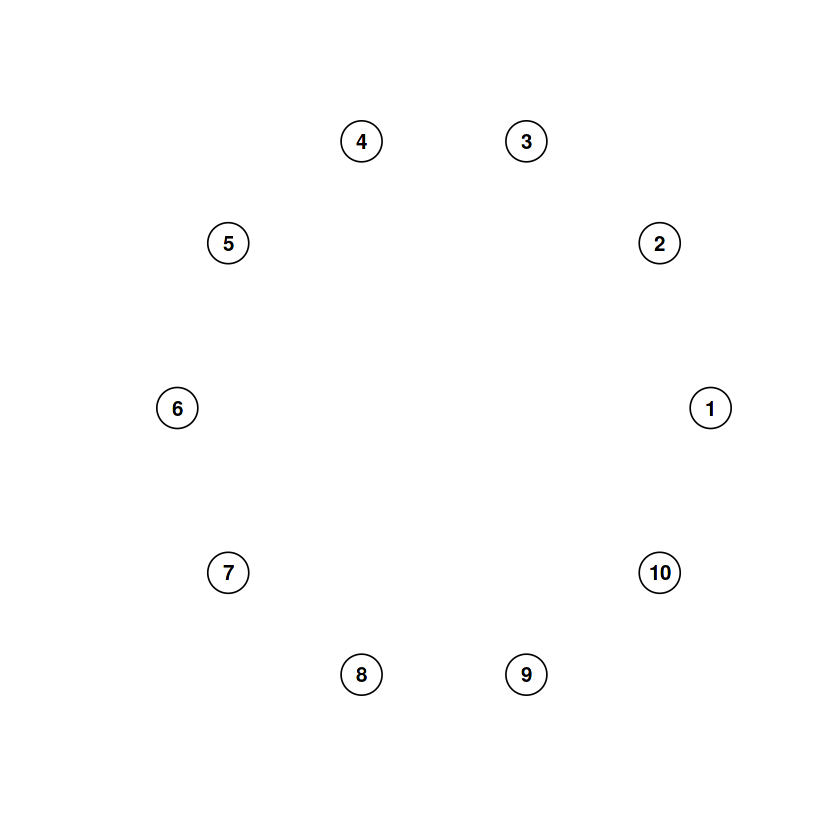

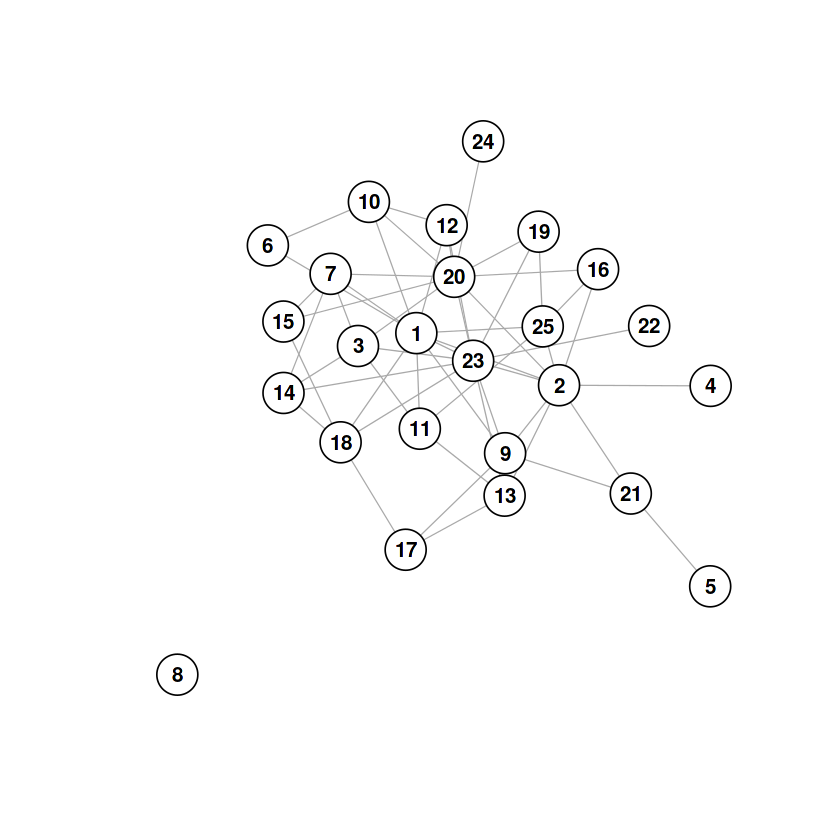

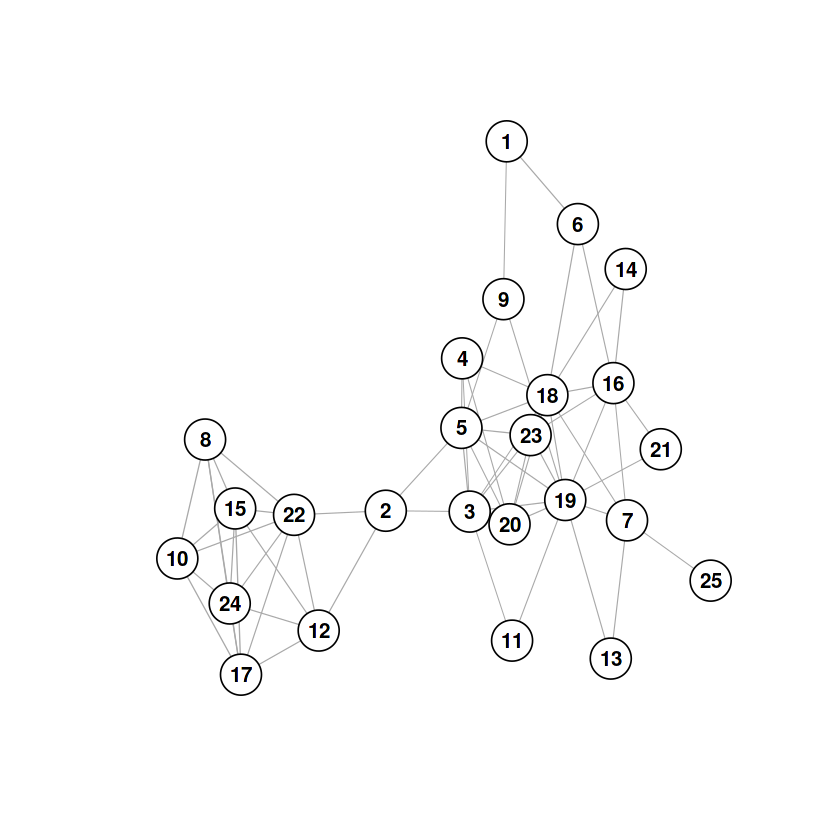

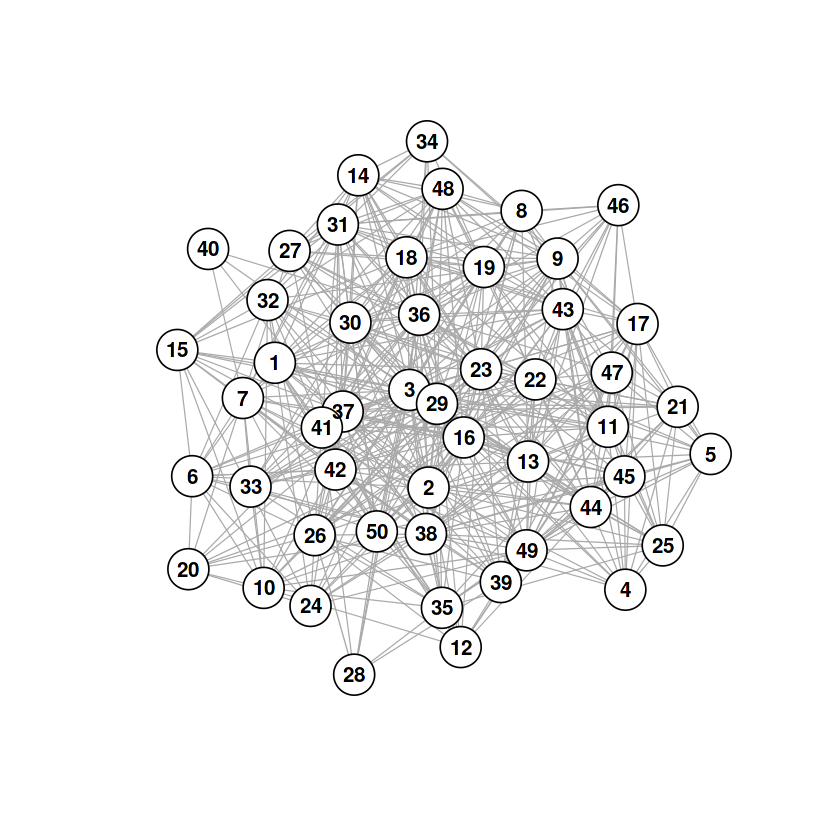

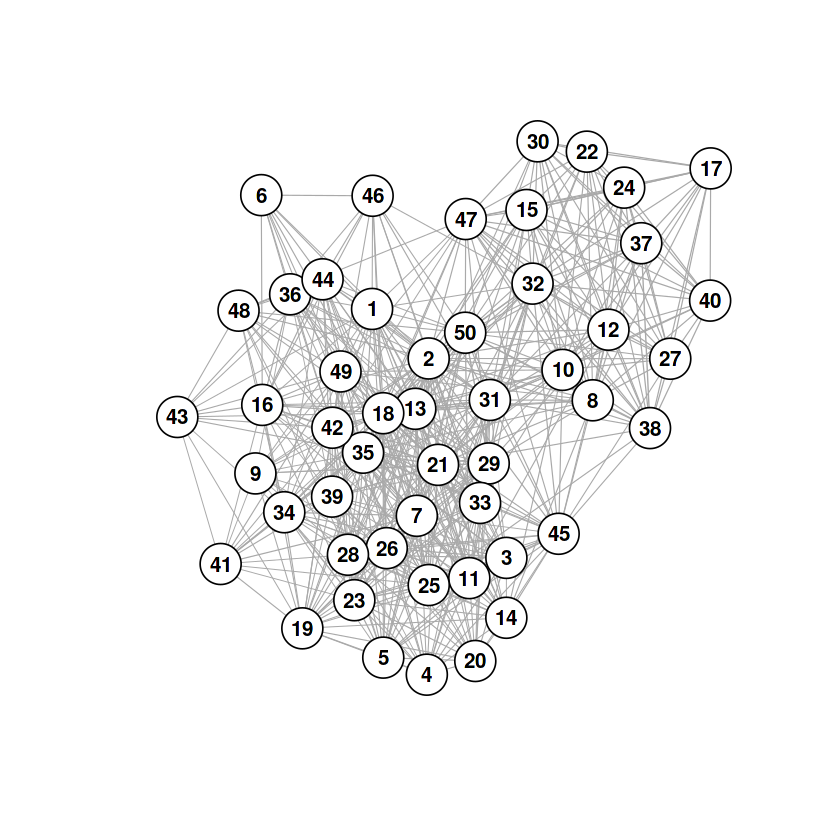

In [34]:
# And create graphs:
g_10_pr <- igraph::graph.adjacency(cor_mat_10_pr, weighted = TRUE , mode= 'undirected')
plot(g_10_pr, layout = layout_with_kk, 
     edge.width=E(g_10_pr)$weight, 
     vertex.label.family = "sans",vertex.label.font=2, vertex.color = "white", vertex.label.color = "black")

g_10_general <- igraph::graph.adjacency(cor_mat_10_general, weighted = TRUE , mode= 'undirected')
plot(g_10_general, layout = layout_with_kk, 
     edge.width=E(g_10_general)$weight, 
     vertex.label.family = "sans",vertex.label.font=2, vertex.color = "white", vertex.label.color = "black")

g_25_pr <- igraph::graph.adjacency(cor_mat_25_pr, weighted = TRUE , mode= 'undirected')
plot(g_25_pr, layout = layout_with_kk, 
     edge.width=E(g_25_pr)$weight, 
     vertex.label.family = "sans",vertex.label.font=2, vertex.color = "white", vertex.label.color = "black")

g_25_general <- igraph::graph.adjacency(cor_mat_25_general, weighted = TRUE , mode= 'undirected')
plot(g_25_general, layout = layout_with_kk, 
     edge.width=E(g_25_general)$weight, 
     vertex.label.family = "sans",vertex.label.font=2, vertex.color = "white", vertex.label.color = "black")

g_50_pr <- igraph::graph.adjacency(cor_mat_50_pr, weighted = TRUE , mode= 'undirected')
plot(g_50_pr, layout = layout_with_kk, 
     edge.width=E(g_50_pr)$weight, 
     vertex.label.family = "sans",vertex.label.font=2, vertex.color = "white", vertex.label.color = "black")

g_50_general <- igraph::graph.adjacency(cor_mat_50_general, weighted = TRUE , mode= 'undirected')
plot(g_50_general, layout = layout_with_kk, 
     edge.width=E(g_50_general)$weight, 
     vertex.label.family = "sans",vertex.label.font=2, vertex.color = "white", vertex.label.color = "black")


In [35]:
#####################################
# Using LDAVis
#####################################
# We need to create a function that allows converting LDA output from the 'topicmodels' package to LDAVis
# https://gist.github.com/trinker/477d7ae65ff6ca73cace
#' Transform Model Output for Use with the LDAvis Package
topicmodels2LDAvis <- function(x, ...){
  post <- topicmodels::posterior(x)
  if (ncol(post[["topics"]]) < 3) stop("The model must contain > 2 topics")
  mat <- x@wordassignments
  LDAvis::createJSON(
    phi = post[["terms"]], 
    theta = post[["topics"]],
    vocab = colnames(post[["terms"]]),
    doc.length = slam::row_sums(mat, na.rm = TRUE),
    term.frequency = slam::col_sums(mat, na.rm = TRUE)
  )
}


In [38]:
# Note: Go to the URL to see the output!
LDAvis::serVis(topicmodels2LDAvis(LDA10_pr), out.dir = "/kaggle/working/LDAVis\\vis_10_pr", open.browser = FALSE)
# http://htmlpreview.github.com/?https://github.com/RFJHaans/topicmodeling/blob/master/Output/2018/LDAVis/vis_10_pr/index.html


Warning message in dir.create(out.dir):
“'/kaggle/working/LDAVis\vis_10_pr' already exists”


In [42]:
LDAvis::serVis(topicmodels2LDAvis(LDA10_general), out.dir = "/kaggle/working/LDAVis\\vis_10_general", open.browser = FALSE)
# http://htmlpreview.github.com/?https://github.com/RFJHaans/topicmodeling/blob/master/Output/2018/LDAVis/vis_10_general/index.html


Warning message in dir.create(out.dir):
“'/kaggle/working/LDAVis\vis_10_general' already exists”


In [43]:
LDAvis::serVis(topicmodels2LDAvis(LDA25_pr), out.dir = "/kaggle/working/LDAVis\\vis_25_pr", open.browser = FALSE)
# http://htmlpreview.github.com/?https://github.com/RFJHaans/topicmodeling/blob/master/Output/2018/LDAVis/vis_25_pr/index.html

LDAvis::serVis(topicmodels2LDAvis(LDA25_general), out.dir = "/kaggle/working/LDAVis\\vis_25_general", open.browser = FALSE)
# http://htmlpreview.github.com/?https://github.com/RFJHaans/topicmodeling/blob/master/Output/2018/LDAVis/vis_25_general/index.html

LDAvis::serVis(topicmodels2LDAvis(LDA50_pr), out.dir = "/kaggle/working/LDAVis\\vis_50_pr", open.browser = FALSE)
# http://htmlpreview.github.com/?https://github.com/RFJHaans/topicmodeling/blob/master/Output/2018/LDAVis/vis_50_pr/index.html



In [ ]:
# LDAvis::serVis(topicmodels2LDAvis(LDA50_general), out.dir = "/kaggle/working/LDAVis\\vis_50_general", open.browser = FALSE)
# # http://htmlpreview.github.com/?https://github.com/RFJHaans/topicmodeling/blob/master/Output/2018/LDAVis/vis_50_general/index.html


In [46]:
LDAvis::serVis(topicmodels2LDAvis(LDA50_general), out.dir = "/kaggle/working/LDAVis\\vis_50_general_1", open.browser = FALSE)
# http://htmlpreview.github.com/?https://github.com/RFJHaans/topicmodeling/blob/master/Output/2018/LDAVis/vis_50_general/index.html
